# Import libreries

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# import data

In [174]:
prothom_alo = pd.read_excel("data/prothom_alo_1jan2021-28june2021_v1 (1).xlsx")
dhaka_tribune = pd.read_csv("data/Dhaka Tribune Complete Data.csv")

In [175]:
prothom_eda = prothom_alo.copy() #for EDA

In [176]:
def missing_values(df):
    print(df.isnull().sum())
    plt.ylabel('missing values')
    plt.plot(pd.DataFrame(df.isnull().sum()))
    plt.show()
    sns.heatmap(df.isnull(),cbar = False).set_title('missing value heatmap')
    plt.show()


In [177]:
prothom_alo.columns

Index(['newspaper_name', 'date_of_incident', 'time_of_incident',
       'incident_type', 'location', 'death_count', 'injury_count',
       'type_of_vehicle1', 'type_of_vehicle2', 'driver_age', 'Unnamed: 10',
       'description_text', 'published-time', 'link', 'full_text'],
      dtype='object')

In [178]:
dhaka_tribune.columns

Index(['Unnamed: 0', 'Newspaper Name', 'Accident date', 'Header', 'News title',
       'Deaths', 'Injured'],
      dtype='object')

Now, i will marge them together

In [179]:
# Drop unnecessary columns from prothom alo newspaper
prothom_alo = prothom_alo.drop(['newspaper_name' , 'time_of_incident','incident_type','type_of_vehicle1','type_of_vehicle2','driver_age', 'Unnamed: 10', 'link','published-time','full_text'], axis=1)
prothom_alo = prothom_alo.drop(['location'],axis =1 ) #temporary drop this column. this column is very important though

# Drop unnecessary columns from Dhaka tribune newspaper
dhaka_tribune = dhaka_tribune.drop(['Newspaper Name','Unnamed: 0','News title'], axis =1)

In [180]:
prothom_alo['date_of_incident'] = pd.to_datetime(prothom_alo['date_of_incident'])
dhaka_tribune['Accident date'] = pd.to_datetime(dhaka_tribune['Accident date'])

In [181]:
data = {
        'Accident date' : prothom_alo['date_of_incident'].tolist(),
        'Header' : prothom_alo['description_text'].tolist(),
        'Deaths' : prothom_alo['death_count'].tolist(),
        'Injured' : prothom_alo['injury_count'].tolist()
        
}
temp_df = pd.DataFrame(data = data)

In [182]:
temp_df

,Accident date,Header,Deaths,Injured
0,2021-06-27,Four people killed in Jashore road accident,4.0,1.0
1,2021-06-23,Three killed in Mymensingh road accident,3.0,0.0
2,2021-06-19,2 killed in Fatullah road accident,2.0,NaN
3,2021-06-18,7 killed in three road accidents in Chattogram...,7.0,22.0
4,2021-06-18,NaN,3.0,NaN
...,...,...,...,...
126,NaT,"At least 11 killed in Sylhet, Bogura",11.0,NaN
127,NaT,Five killed in Narsingdi truck-microbus collis...,5.0,NaN
128,NaT,"Truck, auto-rickshaw head-on collision kills 4...",4.0,NaN
129,NaT,Elderly woman dies after falling off a moving bus,1.0,NaN


In [183]:
df  = pd.concat([temp_df,dhaka_tribune] , ignore_index = True) 

In [184]:
df

,Accident date,Header,Deaths,Injured
0,2021-06-27,Four people killed in Jashore road accident,4.0,1.0
1,2021-06-23,Three killed in Mymensingh road accident,3.0,0.0
2,2021-06-19,2 killed in Fatullah road accident,2.0,NaN
3,2021-06-18,7 killed in three road accidents in Chattogram...,7.0,22.0
4,2021-06-18,NaN,3.0,NaN
...,...,...,...,...
902,2016-08-04,Two motorcyclists killed in Manikganj road acc...,2.0,0.0
903,2016-07-16,Four die in Manikganj road accident,4.0,0.0
904,2016-07-15,BNP leader hurt in Dinajpur road crash,0.0,1.0
905,2016-06-25,Foreigners among 25 injured in Ctg road accident,0.0,25.0


Analysing missing data

Accident date    49
Header            7
Deaths           19
Injured          72
dtype: int64


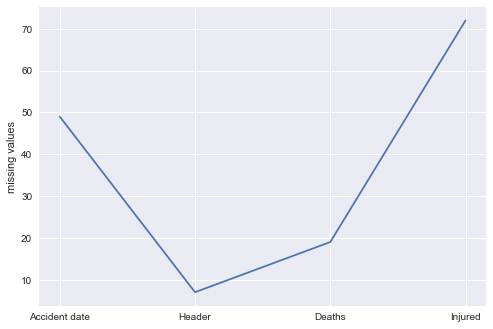

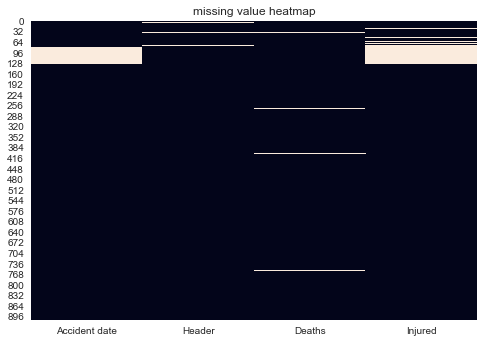

In [185]:
missing_values(df)

In [186]:
# drop all NAN values from 'Accident date' and 'Header' 
df.dropna(subset = ['Accident date', 'Header'], axis =0,inplace = True)

In [187]:
df.shape

(852, 4)

Accident date     0
Header            0
Deaths           16
Injured          20
dtype: int64


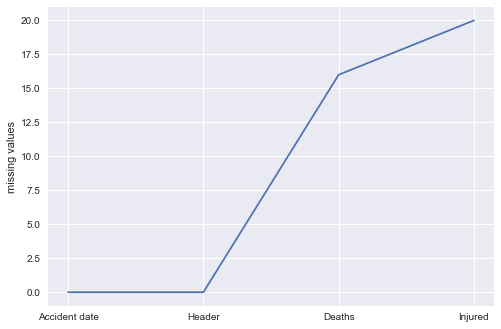

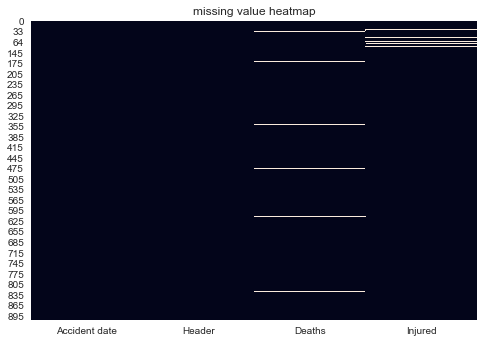

In [188]:
missing_values(df)

In [189]:
df = df.fillna(0)


# EDA (Exploratory data analysis)

Chattogram                   17
Dhaka                        15
Syllhet                       5
Bogura                        4
Brahmanbaria                  4
                             ..
Barisal-Dhaka                 1
Lakshmipur Sadar, upazila     1
Nawabganj                     1
Feni                          1
Chandpur                      1
Name: location, Length: 68, dtype: int64


Text(0, 0.5, 'Count')

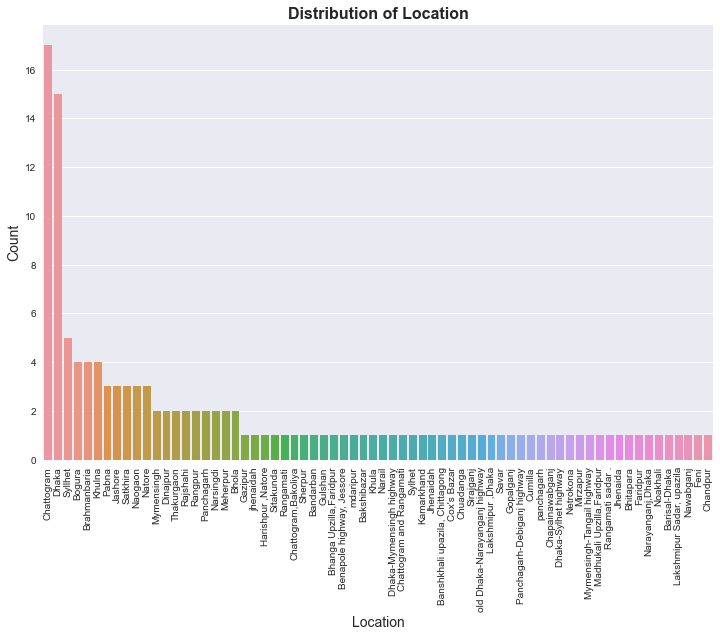

In [190]:
plt.figure(figsize = (12,8))
plt.style.use('seaborn')
location = prothom_eda['location'].value_counts()
print(location)
sns.countplot(x='location', data = prothom_eda,order = location.index)
plt.title('Distribution of Location',fontsize =16 , weight = 'bold')
plt.xticks(rotation =90 , fontsize = 10)
plt.xlabel('Location', fontsize = 14)
plt.ylabel('Count', fontsize =14)

In [191]:
temp = prothom_eda.groupby(['location'],as_index = False)['death_count', 'injury_count'].count()

<ipython-input-191-753b846d8b56>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = prothom_eda.groupby(['location'],as_index = False)['death_count', 'injury_count'].count()


# Word cloud

In [197]:
comment_words =''
stopwords = set(STOPWORDS)

In [200]:
for val in df.Header:
    
    val = str(val)
    
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words +=' '.join(tokens)+' '
    
wordcloud = WordCloud(width = 800 , height =800,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size =10).generate(comment_words)


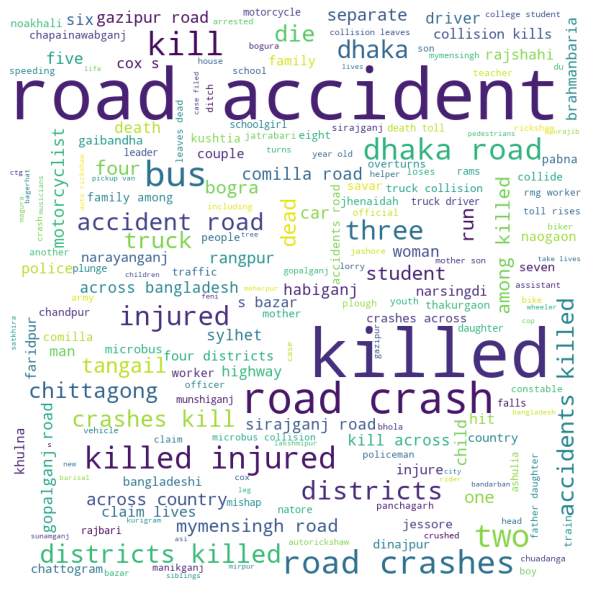

In [201]:
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()